 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [69]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [4]:
whale_returns = pd.read_csv('Resources/whale_returns.csv',index_col=0, parse_dates=True)

In [10]:
# Reading whale returns
display(whale_returns.head(5))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [9]:
# Count nulls
whale_returns.isnull().sum(axis=1).sum()

4

In [51]:
# Drop nulls
whale_returns.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [12]:
# Reading algorithmic returns
algo_returns = pd.read_csv('Resources/algo_returns.csv',index_col=0,parse_dates=True)

In [16]:
# Count nulls
algo_returns.isnull().sum(axis=1).sum()

6

In [52]:
# Drop nulls
algo_returns.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [36]:
# Reading S&P TSX 60 Closing Prices
tsx_returns = pd.read_csv('Resources/sp_tsx_history.csv',index_col=0,parse_dates=True)

In [37]:
# Check Data Types
set(tsx_returns.Close.apply(lambda x:type(x)).tolist())

{str}

In [38]:
# Fix Data Types
tsx_returns.Close = tsx_returns.Close.apply(lambda x: float(x.strip('$').replace(',','')))


In [39]:
# Check Data Types
set(tsx_returns.Close.apply(lambda x:type(x)).tolist())

{float}

In [43]:
# Calculate Daily Returns
tsx_returns.Close = tsx_returns.Close.pct_change()

In [45]:
# Drop nulls
tsx_returns.dropna(inplace=True)

In [46]:
# Rename `Close` Column to be specific to this portfolio.
tsx_returns.rename(columns={'Close':'S&P TSX'},inplace=True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [57]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns,algo_returns,tsx_returns],axis=1)

In [58]:
combined_returns.dropna(inplace=True)

In [59]:
display(combined_returns.head())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

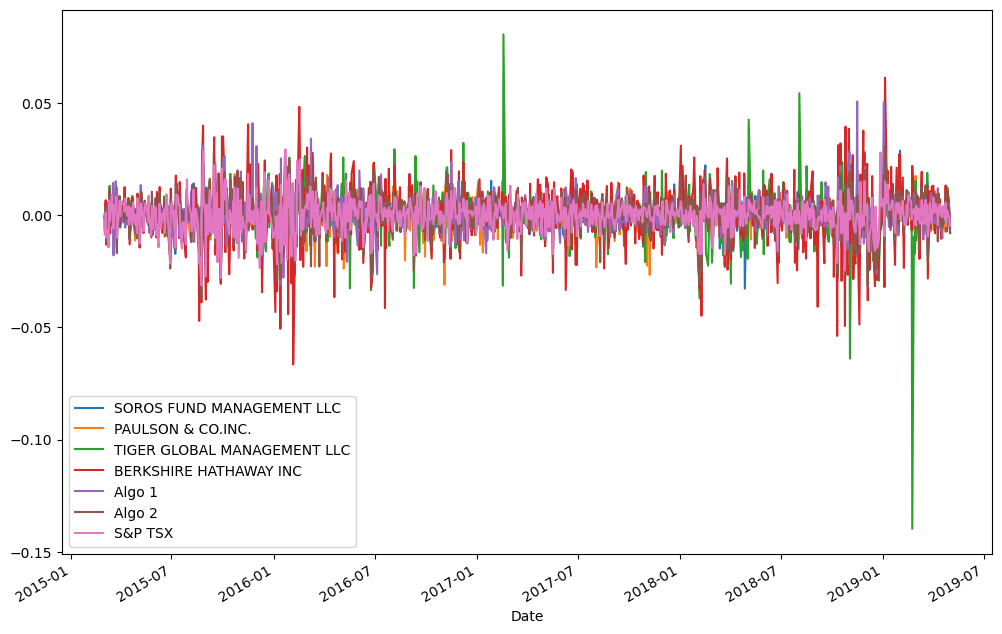

In [65]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(12,8))

#### Calculate and Plot cumulative returns.

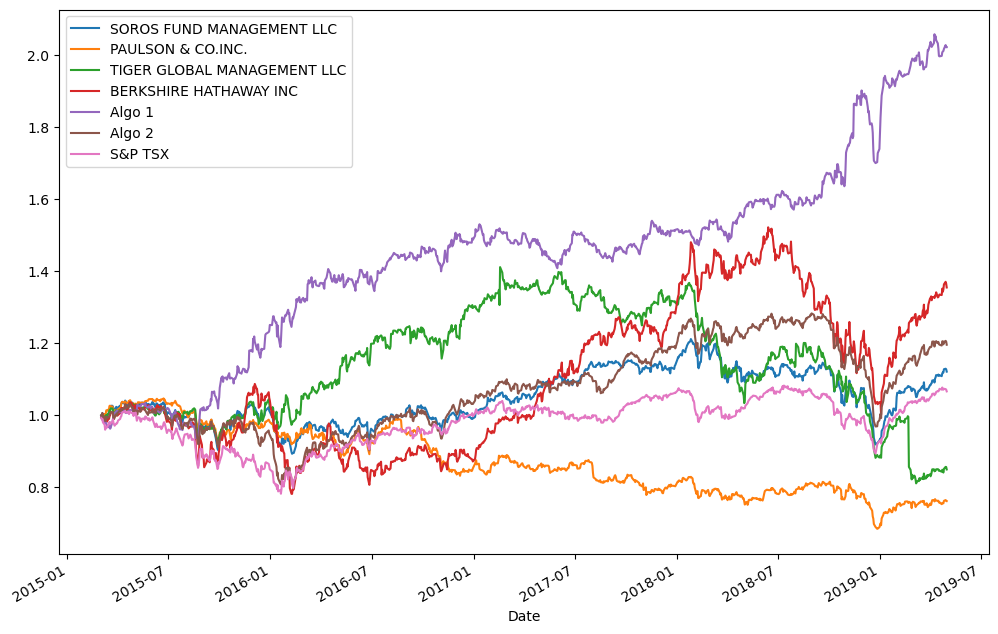

In [70]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (combined_returns+1).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(12,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


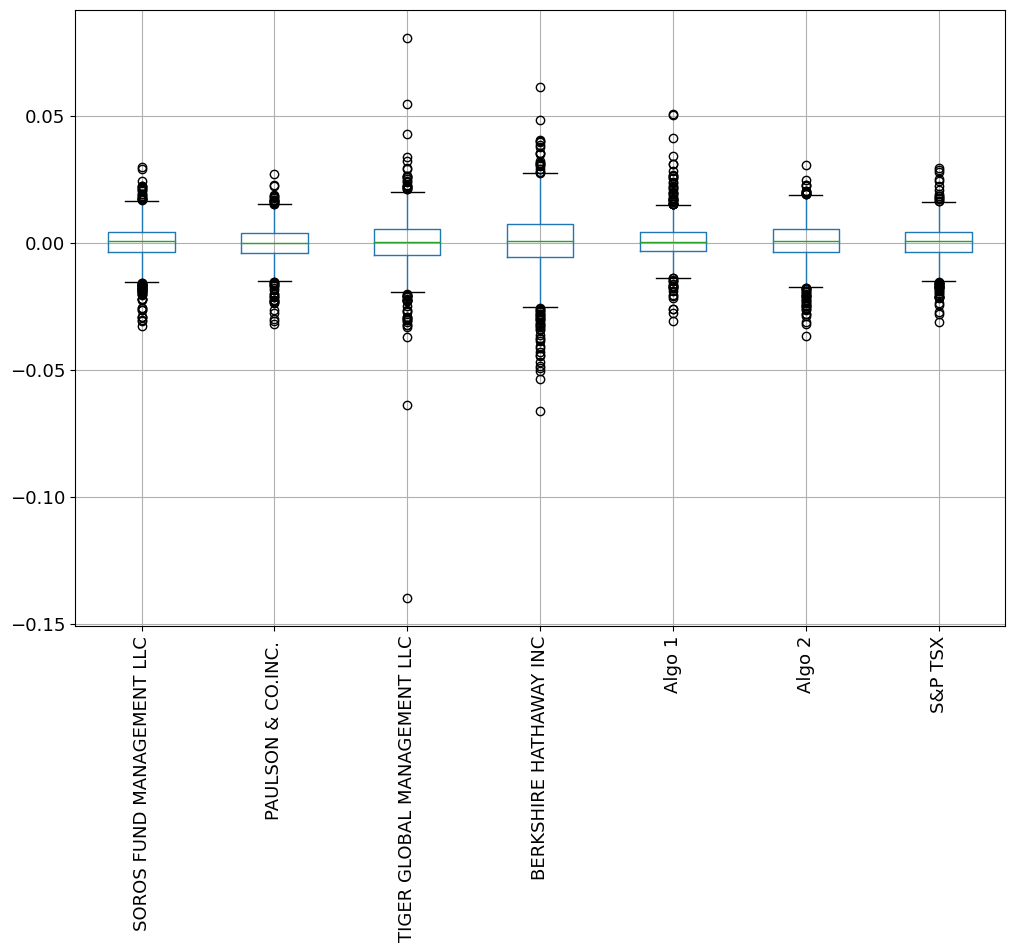

In [79]:
# Box plot to visually show risk
combined_returns.boxplot(figsize=(12,8),fontsize=13,rot=90)

### Calculate Standard Deviations

In [81]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = combined_returns.std()

### Determine which portfolios are riskier than the S&P TSX 60

In [98]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std =portfolio_std['S&P TSX'] 
# Determine which portfolios are riskier than the S&P TSX 60
riskier = ('\n\t * ').join(portfolio_std[portfolio_std>sp_tsx_std].index.tolist())

print("Portfolios Riskier than S&P TSX 60:\n\t * "+riskier)

Portfolios Riskier than S&P TSX 60:
	 * SOROS FUND MANAGEMENT LLC
	 * TIGER GLOBAL MANAGEMENT LLC
	 * BERKSHIRE HATHAWAY INC
	 * Algo 1
	 * Algo 2


### Calculate the Annualized Standard Deviation

In [99]:
# Calculate the annualized standard deviation (252 trading days)
np.sqrt(252)*portfolio_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

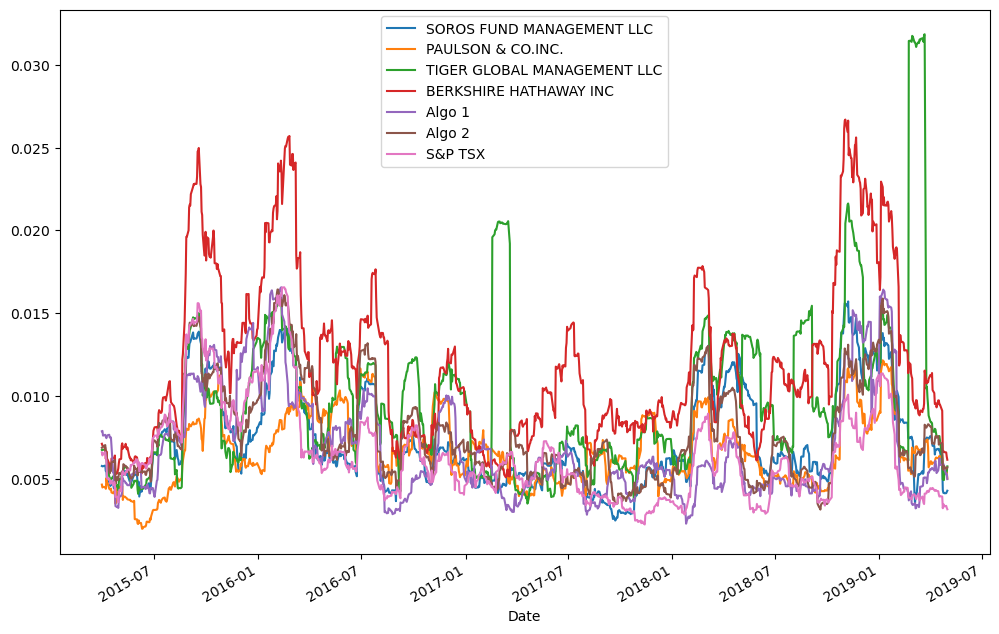

In [102]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = combined_returns.rolling(window=21).std()
rolling_std_21.dropna(inplace=True)
# Plot the rolling standard deviation
rolling_std_21.plot(figsize=(12,8))

### Calculate and plot the correlation

In [105]:
# Calculate the correlation
portfolio_corr = combined_returns.corr()
# Display de correlation matrix


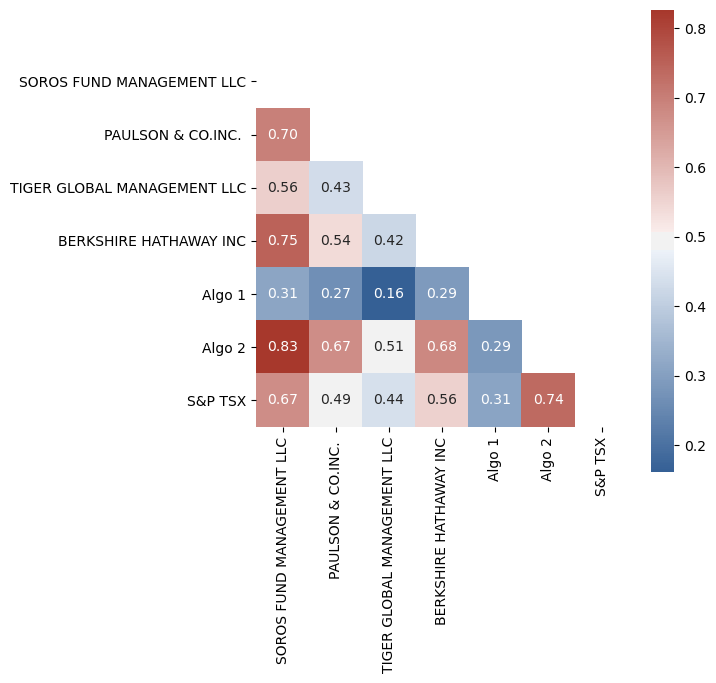

In [111]:
# creating custom palette
cmap = sns.diverging_palette(250,15,s=75,l=40,n=9, center='light', as_cmap=True)
# correlation matrix
matrix = portfolio_corr
# create a mask
mask = np.triu(np.ones_like(matrix,dtype=bool))

fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [119]:
PORTFOLIO_NAME = 'Algo 1'

In [132]:
combined_returns["S&P TSX"].rolling(60).var()

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 1029, dtype: float64

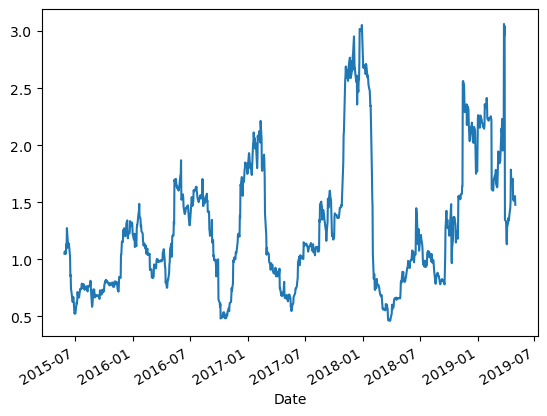

In [134]:
# Calculate covariance of a single portfolio
port_cov = np.cov(combined_returns[PORTFOLIO_NAME])
# Calculate variance of S&P TSX
sp_var = np.var(combined_returns["S&P TSX"])
# Computing beta
beta = port_cov/sp_var

rolling_beta_60 = combined_returns[PORTFOLIO_NAME].rolling(60).cov()/combined_returns["S&P TSX"].rolling(60).var()
# Plot beta trend
rolling_beta_60.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [136]:
# Use `ewm` to calculate the rolling window
ewm_std_21 = combined_returns.ewm(halflife=21).std()
display(ewm_std_21.tail())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564
2019-04-30,0.006617,0.006270,0.014336,0.010481,0.006310,0.007200,0.004507
2019-05-01,0.006636,0.006175,0.014166,0.010460,0.006208,0.007238,0.004546


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [148]:
# assuming risk free rate = 0%

# Annualized Sharpe Ratios
annulized_sharpe = (combined_returns.mean()/(combined_returns.std()))*np.sqrt(252)

In [149]:
annulized_sharpe

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

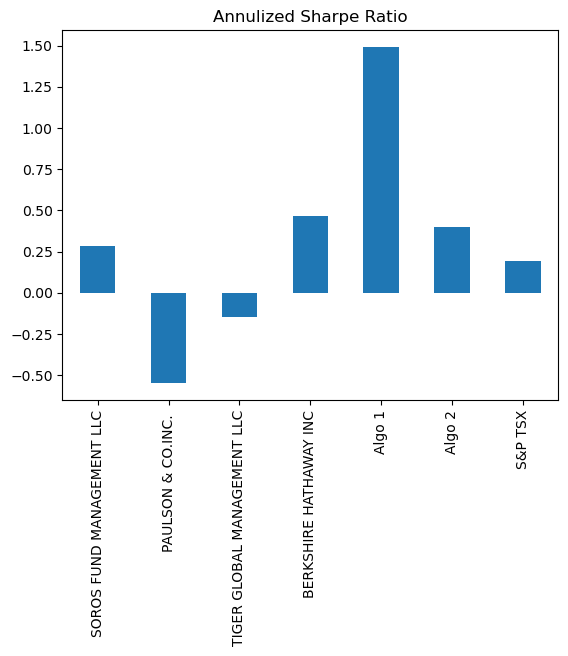

In [151]:
# Visualize the sharpe ratios as a bar plot
annulized_sharpe.plot(kind='bar',title='Annulized Sharpe Ratio')

In [158]:
whale_sharpe = whale_returns.sum(axis=1).mean()/whale_returns.sum(axis=1).std()
whale_sharpe

0.012529848393032757

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

* Both algo1 and algo2 outperform S&P TSX 60
* algo 1 outperformed whales porfolio
* algo 2 underperform berkshire hathaway but outperformed the rest

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [178]:
# Reading data from 1st stock
shop = pd.read_csv("Resources/shop_historical.csv",index_col=1,parse_dates=True)
shop.drop('Symbol',axis=1,inplace=True)
shop.rename(columns={'Close':'SHOP'},inplace=True)

In [182]:
# Reading data from 2nd stock
l = pd.read_csv("Resources/l_historical.csv",index_col=1,parse_dates=True)
l.drop('Symbol',axis=1,inplace=True)
l.rename(columns={'Close':'L'},inplace=True)

In [183]:
# Reading data from 3rd stock
otex = pd.read_csv("Resources/otex_historical.csv",index_col=1,parse_dates=True)
otex.drop('Symbol',axis=1,inplace=True)
otex.rename(columns={'Close':'OTEX'},inplace=True)

In [189]:
# Combine all stocks in a single DataFrame
# Reset Date index
# Reorganize portfolio data by having a column per symbol

p_portfolio = pd.concat([shop,l,otex],axis=1)

In [193]:
display(p_portfolio.tail())

,SHOP,L,OTEX
Date,,,
2019-12-20,513.22,67.90,58.68
2019-12-23,511.62,67.68,57.89
2019-12-24,525.39,67.67,57.44
2019-12-27,534.76,67.78,57.70
2019-12-30,517.79,67.33,57.19


In [194]:
# Calculate daily returns

p_portfolio_returns = p_portfolio.pct_change()
# Drop NAs
p_portfolio_returns.dropna(inplace=True)
# Display sample data
display(p_portfolio_returns.head())

,SHOP,L,OTEX
Date,,,
2018-01-03,0.023398,-0.010002,-0.011703
2018-01-04,0.017092,0.000174,-0.003715
2018-01-05,-0.001455,0.000000,-0.007924
2018-01-08,0.016392,-0.009753,-0.009631
2018-01-09,-0.011254,0.008969,-0.000712


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [199]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_returns = np.sum(p_portfolio_returns*weights, axis=1)
# Display sample data
display(custom_returns.tail())

Date
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [200]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns['CustomPortfolio'] = custom_returns

In [202]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [204]:
# Calculate the annualized `std`
combined_returns.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX                        0.099121
CustomPortfolio                0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

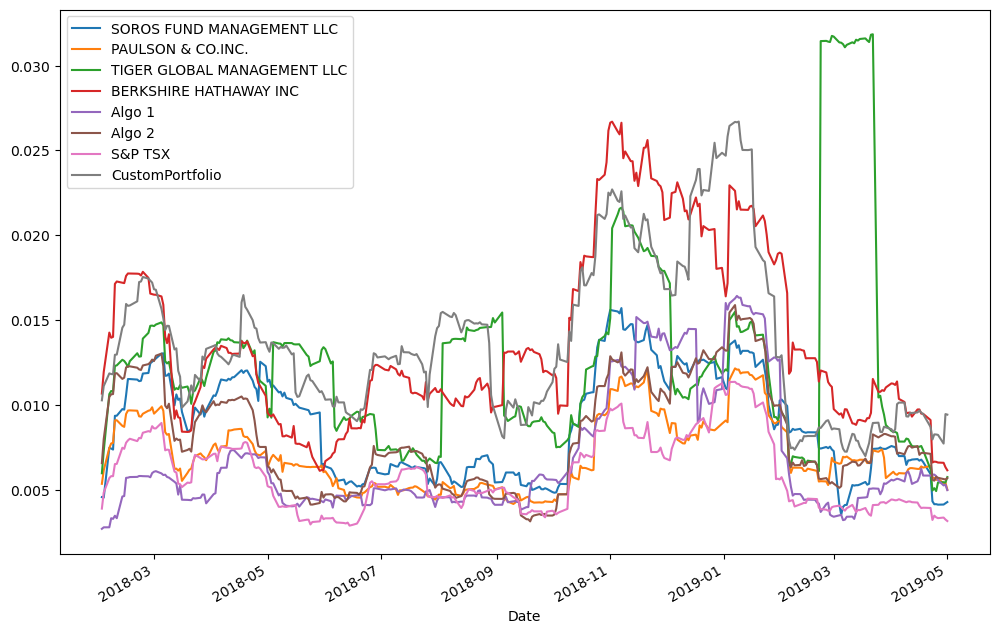

In [205]:
# Calculate rolling standard deviation
new_rolling_std_21 = combined_returns.rolling(21).std()
# Plot rolling standard deviation
new_rolling_std_21.plot(figsize=(12,8))

### Calculate and plot the correlation

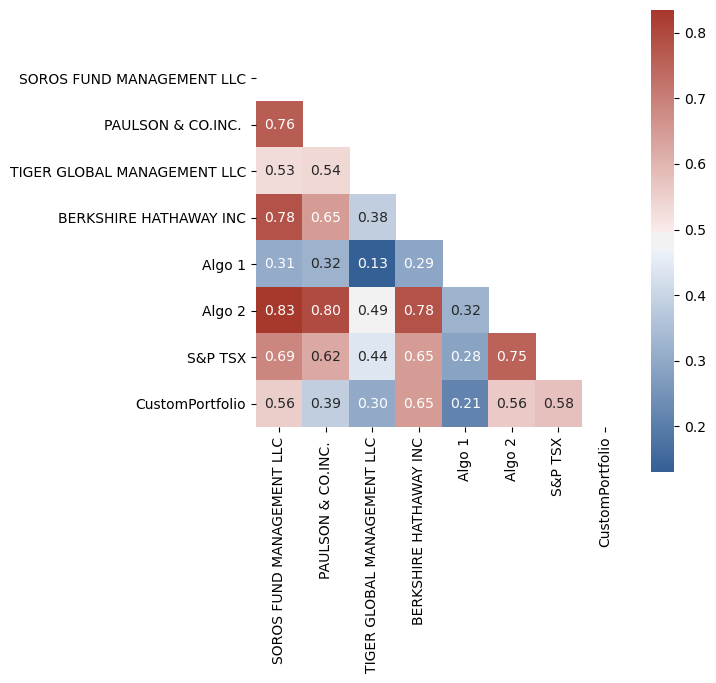

In [209]:
# Calculate and plot the correlation

# creating custom palette
cmap = sns.diverging_palette(250,15,s=75,l=40,n=9, center='light', as_cmap=True)
# correlation matrix
matrix = combined_returns.corr()
# create a mask
mask = np.triu(np.ones_like(matrix,dtype=bool))

fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

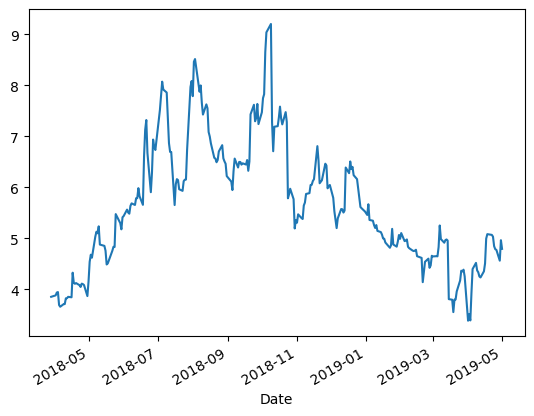

In [210]:
# Calculate and plot Beta
rolling_beta_60 = combined_returns["CustomPortfolio"].rolling(60).cov()/combined_returns["S&P TSX"].rolling(60).var()
# Plot beta trend
rolling_beta_60.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [211]:
# Calculate Annualized Sharpe Ratios
annulized_sharpe = (combined_returns.mean()/(combined_returns.std()))*np.sqrt(252)

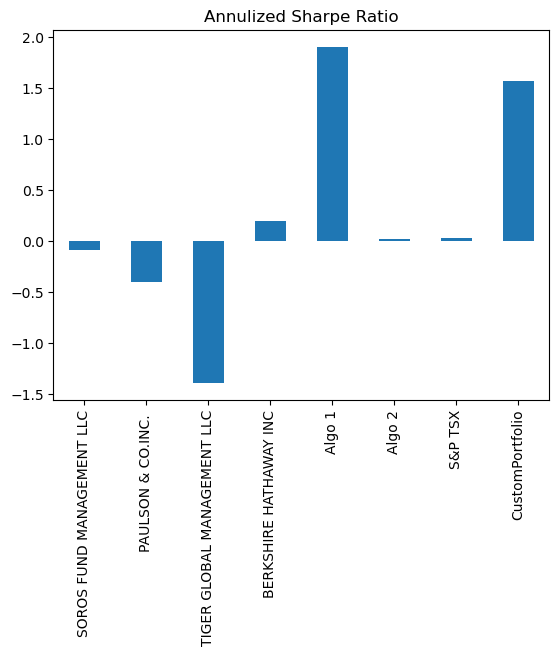

In [212]:
# Visualize the sharpe ratios as a bar plot
annulized_sharpe.plot(kind='bar',title='Annulized Sharpe Ratio')

### How does your portfolio do?

Custom portfolio comprised of SHOP L and OTEX performed extremely well in comparion to all the portfolios except Algo 1. as shown above, it has the second highest sharpe ratio